
# Project: Investigate a Dataset - [TMDB]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I've selected the **TMDB** dataset since I'm a movie fan and I'm familiar with IMDB and how ratings work and all data concerning a movie. The columns present in this dataset are [id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj].

### Question(s) for Analysis
> 1-Do older movies have higher average rating?
2-What kinds of properties are associated with movies that have high revenues?
3-Which genres are most popular from year to year?
4-Rank all movies directed by Christopher Nolan from worse to best

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing all packages used in this analysis


In [2]:
 !pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.1MB/s eta 0:00:01   18% |██████                          | 1.9MB 22.2MB/s eta 0:00:01    28% |█████████                       | 2.9MB 17.5MB/s eta 0:00:01    37% |████████████                    | 3.9MB 20.0MB/s eta 0:00:01    46% |██████████████▉                 | 4.8MB 20.0MB/s eta 0:00:01    84% |███████████████████████████     | 8.8MB 23.1MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.6MB/s eta 0:00:01   14% |████▉                           | 2.0MB 22.5MB/s eta 0:00:01    30% |█████████▊                      | 4.1MB 18.3MB/s eta 0:00:01    36% |███████████▊                    | 4.9MB 17.6MB/s eta 0:00:01    43% |█████████████▊                  | 5.8MB 17.8MB/s eta 0:00:01    61% |███████████████████▉            | 8.3MB 16.2MB/s eta 0:00:01    67% |█████████████████████▋          | 9.1MB 17.1MB/s eta 0:00:01    74% |███████████████████████▊        | 9.9MB 17.7MB/s eta 0:00:01    80% |████████████████████████

Upgrading pandas

<a id='wrangling'></a>
## Data Wrangling







In [67]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Loading the dataset and viewing first 5 rows

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Understanding each column's datatype

In [51]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Finding out how many nulls are available in the dataset if any

In [44]:
df.duplicated().sum()

1

Finding out how many duplicates are available


### Data Cleaning

 

In [68]:
df.drop(['id','imdb_id','production_companies','overview','keywords','homepage','release_date','budget_adj','revenue_adj','tagline'], axis=1,inplace=True)
print(df.head())

   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  vote_count  \
0      124  Action|Adventure|Science Fiction|Thriller        5562

Removing all columns irrelevant to our analysis

In [69]:
# Defining a function *Clean* to remove all nulls and duplicates in our dataset
def clean(Dataframe):
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)

In [70]:
# Calling our function and checking if there are still any nulls or duplicates
clean(df)
print(df.isna().sum())
print(df.duplicated().sum())

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64
0


Dropping all nulls and duplicates

In [71]:
# Creating new column lead actor by extracting the first actor from the cast column
df['lead_actor'] = df['cast'].str.split('|')
df['lead_actor'] = df['cast'].str.split('|',expand=True)
# Creating new column genre by extracting the first genre from the genres column
df['genre'] = df['genres'].str.split('|')
df['genre'] = df['genres'].str.split('|',expand=True)
# Creating new column gross profit column by subtracting the revenue from the budget
df['gross_profit'] = df['revenue'] - df['budget']
# Rearranging columns for better view
df = df[["original_title", "release_year", "director","lead_actor","cast",'genre',"genres","runtime","vote_average","vote_count","budget","revenue","gross_profit","popularity"]]

Creating new columns and rearranging the dataset

Now we have a clean dataset ready for analysis

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Do older movies have higher average rating?)

Average rating of old movies = 6.217987804878049
Average rating of new movies = 5.919018809811901


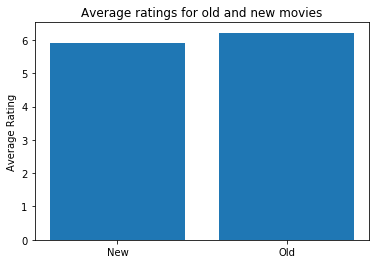

In [72]:
# Getting the middle release year in the dataset
mean_year = (df['release_year'].max() + df['release_year'].min()) / 2

# Creating a new dataframe from the old one and sorting it by release year
sorted_year = df.sort_values(by='release_year')

# Creating two new dataframes from the sorted one to differentiate old and new movies
old = sorted_year.query('release_year <= @mean_year')
new = sorted_year.query('release_year > @mean_year')

# Printing average rating of old and new movies
print("Average rating of old movies = {}".format(old['vote_average'].mean()))
print("Average rating of new movies = {}".format(new['vote_average'].mean()))

# Creating bar diagrams of average rating for old and new movies
plt.bar(['Old','New'],[old.vote_average.mean(),new.vote_average.mean()])
plt.title("Average ratings for old and new movies")
plt.ylabel("Average Rating");

Old movies have higher average rating

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [73]:
rev_mean = df.revenue.mean()
sorted_revenue = df.sort_values(by='revenue')
# Creating two new dataframes from the sorted one to differentiate high and low revenue movies
low = sorted_revenue.query('revenue <= @rev_mean')
high = sorted_revenue.query('revenue > @rev_mean')

In [12]:
low.describe()

,release_year,runtime,vote_average,vote_count,budget,revenue,gross_profit,popularity
count,8575.000000,8575.000000,8575.000000,8575.000000,8.575000e+03,8.575000e+03,8.575000e+03,8575.000000
mean,2001.100991,99.900058,5.883405,69.329796,5.394614e+06,4.018594e+06,-1.376020e+06,0.407514
std,13.300648,31.401787,0.956573,150.962768,1.309992e+07,8.909077e+06,1.267646e+07,0.401735
min,1960.000000,0.000000,1.500000,10.000000,0.000000e+00,0.000000e+00,-4.139124e+08,0.000188
25%,1994.000000,90.000000,5.300000,15.000000,0.000000e+00,0.000000e+00,-2.000000e+05,0.180395
50%,2006.000000,97.000000,5.900000,27.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.315387
75%,2011.000000,108.000000,6.500000,64.000000,4.619392e+06,1.079430e+06,0.000000e+00,0.509912
max,2015.000000,900.000000,9.200000,5754.000000,4.250000e+08,4.028332e+07,4.005088e+07,8.411577


In [13]:
high.describe()

,release_year,runtime,vote_average,vote_count,budget,revenue,gross_profit,popularity
count,2156.000000,2156.000000,2156.000000,2156.000000,2.156000e+03,2.156000e+03,2.156000e+03,2156.000000
mean,2001.890538,112.685529,6.288080,818.325603,5.222593e+07,1.847000e+08,1.324741e+08,1.627447
std,10.676995,24.000781,0.733173,1062.532791,4.866996e+07,2.061715e+08,1.789746e+08,1.787504
min,1960.000000,44.000000,3.400000,10.000000,0.000000e+00,4.034619e+07,-1.657101e+08,0.010335
25%,1996.000000,98.000000,5.800000,193.000000,1.800000e+07,6.719821e+07,4.000000e+07,0.740467
50%,2004.000000,109.000000,6.300000,423.000000,3.950000e+07,1.137862e+08,7.500553e+07,1.165161
75%,2010.000000,123.000000,6.800000,976.750000,7.000000e+07,2.143081e+08,1.539243e+08,1.890647
max,2015.000000,705.000000,8.300000,9767.000000,3.800000e+08,2.781506e+09,2.544506e+09,32.985763


In [14]:
high.describe() - low.describe()

,release_year,runtime,vote_average,vote_count,budget,revenue,gross_profit,popularity
count,-6419.000000,-6419.000000,-6419.000000,-6419.000000,-6.419000e+03,-6.419000e+03,-6.419000e+03,-6419.000000
mean,0.789547,12.785470,0.404675,748.995807,4.683132e+07,1.806814e+08,1.338501e+08,1.219933
std,-2.623653,-7.401006,-0.223401,911.570023,3.557004e+07,1.972625e+08,1.662981e+08,1.385770
min,0.000000,44.000000,1.900000,0.000000,0.000000e+00,4.034619e+07,2.482023e+08,0.010147
25%,2.000000,8.000000,0.500000,178.000000,1.800000e+07,6.719821e+07,4.020000e+07,0.560072
50%,-2.000000,12.000000,0.400000,396.000000,3.950000e+07,1.137862e+08,7.500553e+07,0.849774
75%,-1.000000,15.000000,0.300000,912.750000,6.538061e+07,2.132286e+08,1.539243e+08,1.380735
max,0.000000,-195.000000,-0.900000,4013.000000,-4.500000e+07,2.741223e+09,2.504455e+09,24.574186


As we can see above, higher revenue movies have higher average runtime,rating,budget and popularity

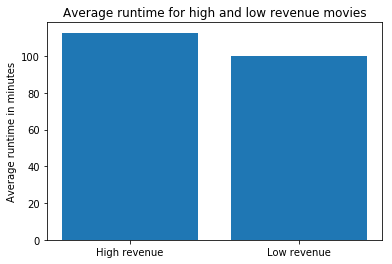

In [83]:
# Finding out the relation between runtime and revenue
plt.bar(['Low revenue','High revenue'],[low.runtime.mean(),high.runtime.mean()])
plt.title("Average runtime for high and low revenue movies")
plt.ylabel("Average runtime in minutes");

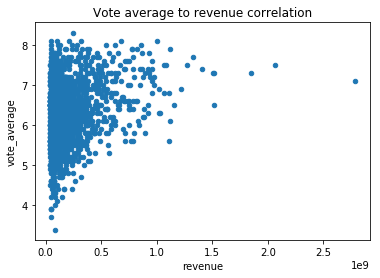

In [75]:
# Finding out the relation between vote average and revenue
# The 3 following plots are scatter plots since both columns are numerical and we want to understand the correlastion
high.plot(x='revenue',y='vote_average',title='Vote average to revenue correlation',kind='scatter');

We deduce that the vote average and revenue have a positive correlation

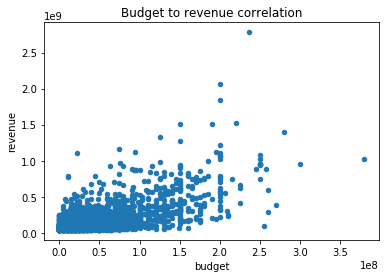

In [76]:
# Finding out the relation between budget and revenue
high.plot(x='budget',y='revenue',title='Budget to revenue correlation',kind='scatter');

We deduce that the budget and revenue have a positive correlation

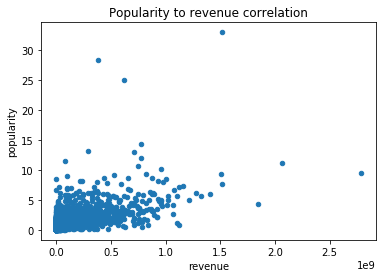

In [77]:
# Finding out the relation between popularity and revenue
df.plot(x='revenue',y='popularity',title='Popularity to revenue correlation',kind='scatter');

We deduce that the popularity and revenue have a positive correlation

### Research Question 3  (Which genres are most popular from year to year?)

In [85]:
# Grouping by year and showing the genre with the highest popularity
pg = df.groupby(['release_year'])[['genre','popularity']].max()
print(pg)

                 genre  popularity
release_year                      
1960          Thriller    2.610362
1961           Western    2.631987
1962           Western    3.170651
1963           Romance    2.508235
1964           Western    3.153791
1965               War    1.910465
1966           Western    1.227582
1967           Western    2.550704
1968           Western    3.309196
1969          Thriller    1.778746
1970           Western    1.936962
1971           Western    3.072555
1972           Western    5.738034
1973           Western    2.272486
1974          Thriller    3.264571
1975           Western    3.258151
1976          Thriller    2.582657
1977           Western   12.037933
1978          Thriller    1.697618
1979           Western    4.935897
1980           Western    5.488441
1981          Thriller    4.578300
1982           Western    4.215642
1983               War    4.828854
1984               War    4.831966
1985          Thriller    6.095293
1986          Thrill

The most popular genre from each year

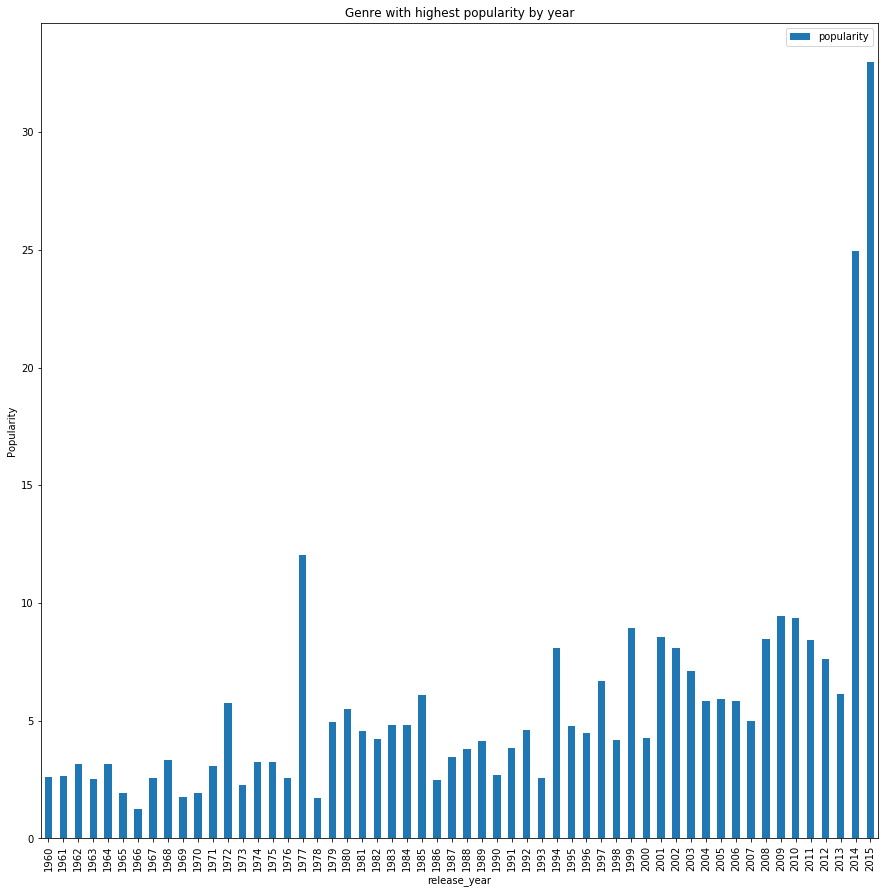

In [86]:
# Plotting movie genres with the highest popularity by year as a bar diagram
pgp = pg.plot(kind="bar",title='Genre with highest popularity by year',figsize=(15,15))
pgp.set(ylabel='Popularity');

### Research Question 4  (Rank all movies directed by Christopher Nolan from worse to best)

In [24]:
# Extracting Nolan's movies
cn = df[df['director'].str.contains('Christopher Nolan')][['original_title','release_year','vote_average']]
# Sorting by vote_average descendingly
cn.sort_values(by='vote_average',ascending=False,inplace=True)
cn

,original_title,release_year,vote_average
2875,The Dark Knight,2008,8.1
629,Interstellar,2014,8.0
1919,Inception,2010,7.9
8662,Memento,2000,7.9
6565,The Prestige,2006,7.8
4363,The Dark Knight Rises,2012,7.5
6191,Batman Begins,2005,7.3
9129,Following,1998,7.1
3955,Insomnia,2002,6.6
5399,Doodlebug,1997,6.5


Retrieving title,year and average rating for all movies directed by Nolan and sorting them by the rating descendingly

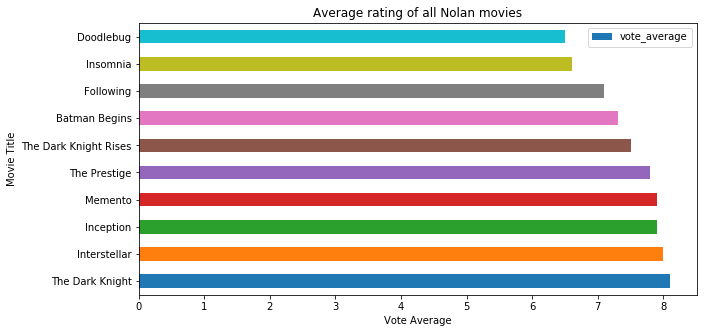

In [32]:
# Plotting the movie ranks
cnp = cn.plot.barh(x='original_title',y='vote_average',title='Average rating of all Nolan movies',figsize=(10,5))
cnp.set(xlabel="Vote Average", ylabel="Movie Title");

Plotting our finding

<a id='conclusions'></a>
## Conclusions

> We conclude from all previous analysis that older movies have higher average rating, new movies have much higher popularity, movies with high revenues have higher average rating, populairty, runtime and budget, we also found out which genres are most popular by year.

> Our exploration has few limitations regarding the point where we dropped all nulls in the dataset rather than filling them randomly, since they were string datatypes and can't be filled from different movies, and this choise might affect the analysis overall quality, we also dropped all columns irrelevant to our analysis , it's not really a limitation but some analysts might prefer using these columns elsewhere. 



In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0